In [1]:
# import libraries
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# load data
data = np.load("../data/processed/processed_data.npz", allow_pickle=True)
X = data["X_train"]
feature_names = data["feature_names"]

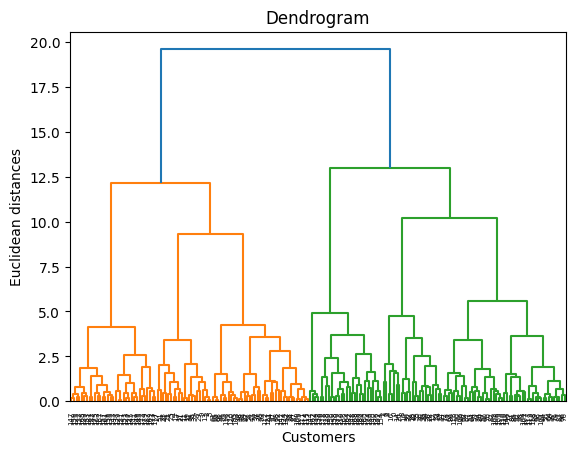

In [3]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

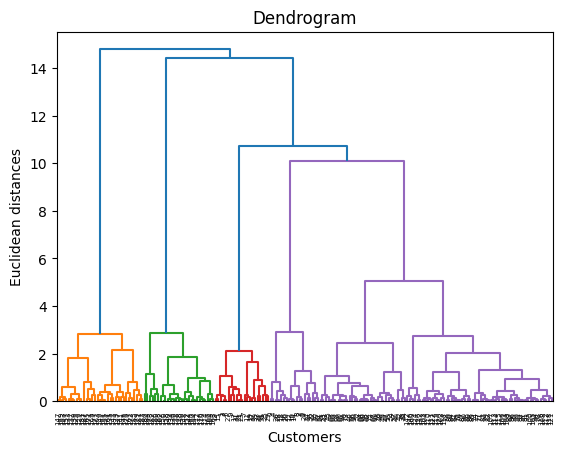

In [4]:
dendrogram = sch.dendrogram(sch.linkage(X[:,2:], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
hc = AgglomerativeClustering(n_clusters = 5, metric= 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X[:,2:])

In [6]:
print(y_hc, y_hc.shape)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 0 4 2 4 2 4 0 4 2 4 2 4 2 4 2 4 0 4 2 4 0 4
 2 4 2 4 2 4 2 4 2 4 2 4 0 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2] (189,)


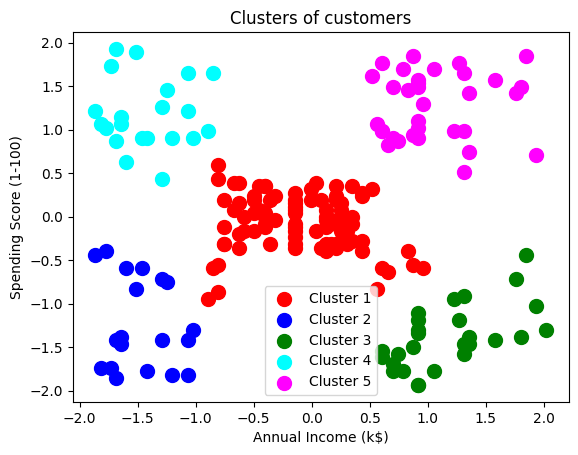

In [7]:
plt.scatter(X[y_hc == 0, 2], X[y_hc == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 2], X[y_hc == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 2], X[y_hc == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 2], X[y_hc == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 2], X[y_hc == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [8]:
score = silhouette_score(X[:,2:], y_hc)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.560
